In [1]:
#only run this cell if you're on colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = '/content/drive/My Drive/Wine_Recommendation_Challenge/'

# Data Exploration

In [3]:
import pandas as pd
import os
import numpy as np

#again do this only if you're on colab
data = pd.read_csv(os.path.join(path,"assignment_dataset.csv"))
data.head()

,title,variety,designation,country,province,description,price,winery,taster_name,points
0,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Vulkà Bianco,Italy,Sicily & Sardinia,"Aromas include tropical fruit, broom, brimston...",NaN,Nicosia,Kerin O’Keefe,87
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Avidagos,Portugal,Douro,"This is ripe and fruity, a wine that is smooth...",15.0,Quinta dos Avidagos,Roger Voss,87
2,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,NaN,US,Oregon,"Tart and snappy, the flavors of lime flesh and...",14.0,Rainstorm,Paul Gregutt,87
3,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,Reserve Late Harvest,US,Michigan,"Pineapple rind, lemon pith and orange blossom ...",13.0,St. Julian,Alexander Peartree,87
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Vintner's Reserve Wild Child Block,US,Oregon,"Much like the regular bottling from 2012, this...",65.0,Sweet Cheeks,Paul Gregutt,87


In [0]:
#run this other line if you're running it locally
#data = pd.read_csv("assignment_dataset.csv") 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 10 columns):
title          129971 non-null object
variety        129970 non-null object
designation    92506 non-null object
country        129908 non-null object
province       129908 non-null object
description    129971 non-null object
price          120975 non-null float64
winery         129971 non-null object
taster_name    103727 non-null object
points         129971 non-null int64
dtypes: float64(1), int64(1), object(8)
memory usage: 9.9+ MB


In [5]:
data.price.describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

SPLIT TRAIN AND TEST BASED ON ENTRIES WITH NULL PRICE

In [0]:
discrim = np.isnan(data.price.values)

In [0]:
train = data[~discrim].reset_index(drop=True)
test = data[discrim].reset_index(drop=True)

In [8]:
test.head()

,title,variety,designation,country,province,description,price,winery,taster_name,points
0,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Vulkà Bianco,Italy,Sicily & Sardinia,"Aromas include tropical fruit, broom, brimston...",NaN,Nicosia,Kerin O’Keefe,87
1,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Rosso,Italy,Sicily & Sardinia,This is dominated by oak and oak-driven aromas...,NaN,Masseria Setteporte,Kerin O’Keefe,87
2,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Nouveau,France,Beaujolais,Red cherry fruit comes laced with light tannin...,NaN,Domaine de la Madone,Roger Voss,86
3,Duca di Salaparuta 2010 Calanìca Nero d'Avola-...,Red Blend,Calanìca Nero d'Avola-Merlot,Italy,Sicily & Sardinia,Merlot and Nero d'Avola form the base for this...,NaN,Duca di Salaparuta,NaN,86
4,Duca di Salaparuta 2011 Calanìca Grillo-Viogni...,White Blend,Calanìca Grillo-Viognier,Italy,Sicily & Sardinia,"Part of the extended Calanìca series, this Gri...",NaN,Duca di Salaparuta,NaN,86


In [9]:

train.head()

,title,variety,designation,country,province,description,price,winery,taster_name,points
0,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Avidagos,Portugal,Douro,"This is ripe and fruity, a wine that is smooth...",15.0,Quinta dos Avidagos,Roger Voss,87
1,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,NaN,US,Oregon,"Tart and snappy, the flavors of lime flesh and...",14.0,Rainstorm,Paul Gregutt,87
2,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,Reserve Late Harvest,US,Michigan,"Pineapple rind, lemon pith and orange blossom ...",13.0,St. Julian,Alexander Peartree,87
3,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Vintner's Reserve Wild Child Block,US,Oregon,"Much like the regular bottling from 2012, this...",65.0,Sweet Cheeks,Paul Gregutt,87
4,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Ars In Vitro,Spain,Northern Spain,Blackberry and raspberry aromas show a typical...,15.0,Tandem,Michael Schachner,87


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120975 entries, 0 to 120974
Data columns (total 10 columns):
title          120975 non-null object
variety        120974 non-null object
designation    86196 non-null object
country        120916 non-null object
province       120916 non-null object
description    120975 non-null object
price          120975 non-null float64
winery         120975 non-null object
taster_name    96479 non-null object
points         120975 non-null int64
dtypes: float64(1), int64(1), object(8)
memory usage: 9.2+ MB


PLOT PRICE

Text(0.5, 1.0, 'Log-Price Distribution')

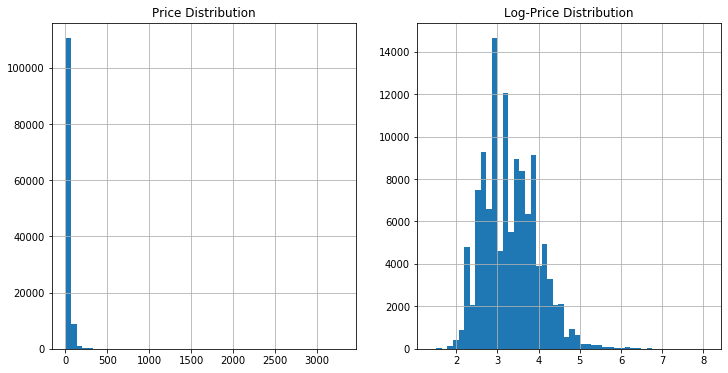

In [11]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
train['price'].hist(bins=50, figsize=(12, 6))
plt.title('Price Distribution', fontsize=12)

plt.subplot(1, 2, 2)
np.log(train['price']).hist(bins=50, figsize=(12, 6))
plt.title('Log-Price Distribution', fontsize=12)

**Price Outliers**

In [12]:
train.price.describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

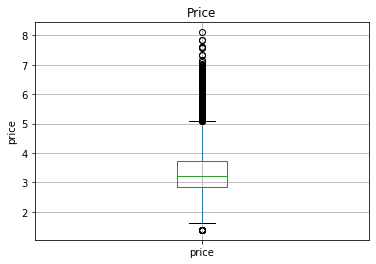

In [13]:
train = train.copy()
train['price'] = np.log(train['price'])
train.boxplot(column='price')
plt.title('Price')
plt.ylabel('price')
plt.show()

There are quite a few egregious outliers. Let's remove some of them.

In [0]:
price_mean = np.mean(train.price.values)
std_price = np.std(train.price.values)
price_outliers = np.logical_and(train.price.values < price_mean + 3*std_price, train.price.values > price_mean - 3*std_price)

In [15]:
np.unique(price_outliers)

array([False,  True])

In [16]:
train.shape

(120975, 10)

In [17]:
train = train.copy()
train = train[price_outliers]
train.shape

(120186, 10)

Replotting without outliers.

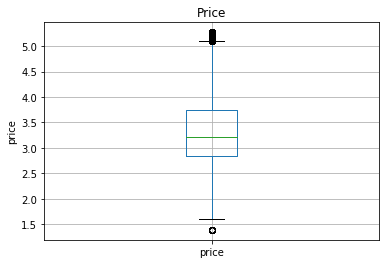

In [18]:
train.boxplot(column='price')
plt.title('Price')
plt.ylabel('price')
plt.show()

**Relationship between values being missing and Sale Price**

In [0]:
# make a list of the categorical variables that contain missing values
vars_with_na = [var for var in data.columns if train[var].isnull().sum()>1]

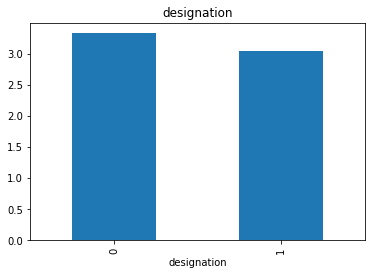

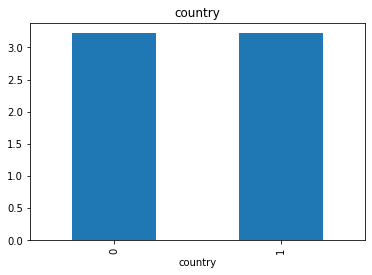

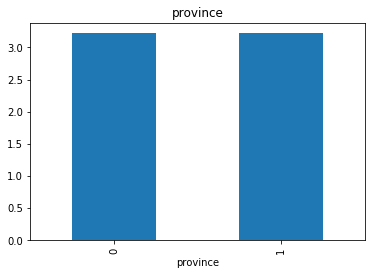

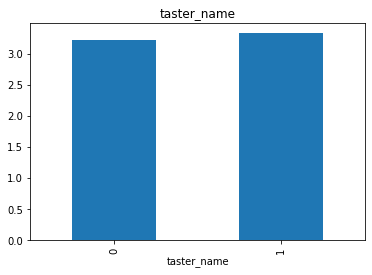

In [20]:
def analyse_na_value(df, var):
    df = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    df.groupby(var)['price'].median().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_with_na:
    analyse_na_value(train, var)

# **NUMERICAL VARIABLES**

In [21]:
# list of numerical variables
num_vars = [var for var in train.columns if train[var].dtypes != 'O']
num_vars

['price', 'points']

**Discrete Variables**

In [22]:
#  list of discrete variables
discrete_vars = [var for var in num_vars if len(train[var].unique())<20]
discrete_vars

[]

In [23]:
train.points.describe()

count    120186.000000
mean         88.384130
std           3.010805
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [24]:
train.points.unique()

array([ 87,  86,  85,  88,  92,  91,  90,  89,  83,  82,  81,  80,  97,
        96,  95,  93,  94,  84,  99,  98, 100])

In [25]:
train[num_vars].corr()

,price,points
price,1.000000,0.601831
points,0.601831,1.000000


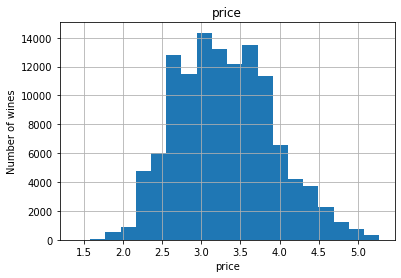

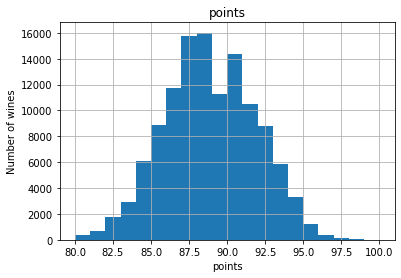

In [26]:
# Let's go ahead and analyse the distributions of these variables
def analyse_continous(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('Number of wines')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in num_vars:
    analyse_continous(train, var)

We notice that the numerical variables are quite well normally distributed. This will allow a linear model to fit the data well.

**Points vs. Price**

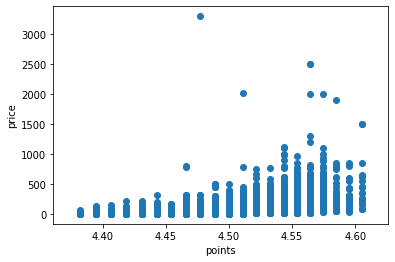

In [27]:
# let's explore the relationship between the wine price and the transformed numerical variables
# with more detail
def transform_analyse_continous(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in train[var].unique():
        pass
    else:
        # log transform
        df[var] = np.log(df[var])
        #df['price'] = np.log(df['price'])
        plt.scatter(df[var], df['price'])
        plt.ylabel('price')
        plt.xlabel(var)
        plt.show()
    
for var in num_vars:
    if var !='price':
        transform_analyse_continous(data, var)

Points and price show a decent correlation between them.

In [0]:
import seaborn as sns

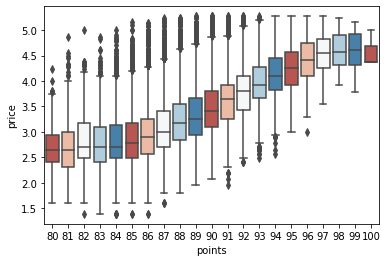

In [29]:
sns.boxplot(x = 'points', y = train['price'], data = train, palette = sns.color_palette('RdBu',5))

Another visual proof of correlation between price and points.

**CATEGORICAL VARIABLES**

In [30]:
### Categorical variables

cat_vars = [var for var in train.columns if train[var].dtypes=='O']
cat_vars

['title',
 'variety',
 'designation',
 'country',
 'province',
 'description',
 'winery',
 'taster_name']

In [31]:
# let's visualise the values of the categorical variables
train[cat_vars].head()

,title,variety,designation,country,province,description,winery,taster_name
0,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Avidagos,Portugal,Douro,"This is ripe and fruity, a wine that is smooth...",Quinta dos Avidagos,Roger Voss
1,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,NaN,US,Oregon,"Tart and snappy, the flavors of lime flesh and...",Rainstorm,Paul Gregutt
2,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,Reserve Late Harvest,US,Michigan,"Pineapple rind, lemon pith and orange blossom ...",St. Julian,Alexander Peartree
3,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Vintner's Reserve Wild Child Block,US,Oregon,"Much like the regular bottling from 2012, this...",Sweet Cheeks,Paul Gregutt
4,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Ars In Vitro,Spain,Northern Spain,Blackberry and raspberry aromas show a typical...,Tandem,Michael Schachner


**Number of labels: cardinality**

Let's evaluate how many different categories are present in each of the variables.

In [32]:
for var in cat_vars:
    print(var, len(train[var].unique()), ' categories')

title 109883  categories
variety 696  categories
designation 35553  categories
country 43  categories
province 423  categories
description 110798  categories
winery 15816  categories
taster_name 20  categories


**Wine varieties**

In [33]:
print('There are', train['variety'].nunique(), 'unique values in variety column')

There are 695 unique values in variety column


Top 10 most common category names:

In [34]:
train['variety'].value_counts()[:10]

Pinot Noir                  12657
Chardonnay                  11006
Cabernet Sauvignon           9281
Red Blend                    8431
Bordeaux-style Red Blend     5240
Riesling                     4921
Sauvignon Blanc              4783
Syrah                        4071
Rosé                         3261
Merlot                       3041
Name: variety, dtype: int64

# **Preprocess the data**

We will turn strings and categorical data into numbers.
This is necessary to feed the data to a machine learning model to estimate the price.

**Replace Missing Values**

In [0]:
# make a list of the categorical variables that contain missing values
vars_with_na = [var for var in train.columns if train[var].isnull().sum()>1 and train[var].dtypes=='O']

In [36]:
# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(train[var].isnull().mean(), 3),  ' % missing values')

designation 0.287  % missing values
country 0.0  % missing values
province 0.0  % missing values
taster_name 0.203  % missing values


In [0]:
# function to replace NA in categorical variables
def fill_categorical_na(df, var_list):
    X = df.copy()
    X[var_list] = df[var_list].fillna('Missing')
    return X

In [38]:
# replace missing values with new label: "Missing"
train = fill_categorical_na(train, vars_with_na)
test2 = fill_categorical_na(test, vars_with_na)

# check that we have no missing information in the engineered variables
train[vars_with_na].isnull().sum()

designation    0
country        0
province       0
taster_name    0
dtype: int64

In [0]:
# def to_categorical(dataset):
#     dataset['designation'] = dataset['designation'].astype('category')
#     dataset['country'] = dataset['country'].astype('category')
#     dataset['province'] = dataset['province'].astype('category')
#     dataset['taster_name'] = dataset['taster_name'].astype('category')

In [0]:
# to_categorical(train)
# to_categorical(test)

**Feature Scaling**

We do this for the only numerical feature: Points.

In [0]:
train['points'] /= train['points'].max()

In [0]:
test2['points'] /= test2['points'].max()

In [43]:
train.head(10)

,title,variety,designation,country,province,description,price,winery,taster_name,points
0,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Avidagos,Portugal,Douro,"This is ripe and fruity, a wine that is smooth...",2.708050,Quinta dos Avidagos,Roger Voss,0.87
1,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Missing,US,Oregon,"Tart and snappy, the flavors of lime flesh and...",2.639057,Rainstorm,Paul Gregutt,0.87
2,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,Reserve Late Harvest,US,Michigan,"Pineapple rind, lemon pith and orange blossom ...",2.564949,St. Julian,Alexander Peartree,0.87
3,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Vintner's Reserve Wild Child Block,US,Oregon,"Much like the regular bottling from 2012, this...",4.174387,Sweet Cheeks,Paul Gregutt,0.87
4,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Ars In Vitro,Spain,Northern Spain,Blackberry and raspberry aromas show a typical...,2.708050,Tandem,Michael Schachner,0.87
5,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Belsito,Italy,Sicily & Sardinia,"Here's a bright, informal red that opens with ...",2.772589,Terre di Giurfo,Kerin O’Keefe,0.87
6,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Missing,France,Alsace,This dry and restrained wine offers spice in p...,3.178054,Trimbach,Roger Voss,0.87
7,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Shine,Germany,Rheinhessen,Savory dried thyme notes accent sunnier flavor...,2.484907,Heinz Eifel,Anna Lee C. Iijima,0.87
8,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Les Natures,France,Alsace,This has great depth of flavor with its fresh ...,3.295837,Jean-Baptiste Adam,Roger Voss,0.87
9,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Mountain Cuvée,US,California,"Soft, supple plum envelopes an oaky structure ...",2.944439,Kirkland Signature,Virginie Boone,0.87


**Transform categorical variables**

In [44]:
cat_vars = [var for var in train.columns if train[var].dtypes=='O' and var not in ['title','description']]
cat_vars

['variety', 'designation', 'country', 'province', 'winery', 'taster_name']

In [0]:
def find_frequent_labels(df, var, rare_perc):
    # finds the labels that are shared by more than a certain % of the houses in the dataset
    df = df.copy()
    tmp = df.groupby(var)['price'].count() / len(df)
    return tmp[tmp>rare_perc].index

for var in cat_vars:
    frequent_ls = find_frequent_labels(train, var, 0.01)
    train[var] = np.where(train[var].isin(frequent_ls), train[var], 'Rare')
    test2[var] = np.where(test2[var].isin(frequent_ls), test2[var], 'Rare')

In [0]:
# this function will assign discrete values to the strings of the variables, 
# so that the smaller value corresponds to the smaller mean of target

def replace_categories(train, test, var, target):
    ordered_labels = train.groupby([var])[target].mean().sort_values().index
    ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
    train[var] = train[var].map(ordinal_label)
    test2[var] = test2[var].map(ordinal_label)

In [0]:
for var in cat_vars:
    replace_categories(train, test2, var, 'price')

In [48]:
train.head()

,title,variety,designation,country,province,description,price,winery,taster_name,points
0,Quinta dos Avidagos 2011 Avidagos Red (Douro),2,2,1,3,"This is ripe and fruity, a wine that is smooth...",2.708050,0,5,0.87
1,Rainstorm 2013 Pinot Gris (Willamette Valley),4,1,12,13,"Tart and snappy, the flavors of lime flesh and...",2.639057,0,9,0.87
2,St. Julian 2013 Reserve Late Harvest Riesling ...,9,2,12,3,"Pineapple rind, lemon pith and orange blossom ...",2.564949,0,2,0.87
3,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,20,2,12,13,"Much like the regular bottling from 2012, this...",4.174387,0,9,0.87
4,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,7,2,4,4,Blackberry and raspberry aromas show a typical...,2.708050,0,0,0.87


**Tokenize title and description**

In [49]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
title_tk = Tokenizer(filters='')
title_tk.fit_on_texts(train['title'])

In [0]:
title_train = title_tk.texts_to_sequences(train['title'])
title_test = title_tk.texts_to_sequences(test2['title'])

In [0]:
max_length = np.max([len(i) for i in title_train])
title_pad_train = pad_sequences(title_train, padding='post', maxlen=max_length)
title_pad_test = pad_sequences(title_test, padding='post', maxlen=max_length)

In [53]:
title_pad_train.shape

(120186, 24)

Tokenize description

In [0]:
tk_desc = Tokenizer()
tk_desc.fit_on_texts(train['description'])

In [0]:
desc_tok_train = tk_desc.texts_to_sequences(train['description'])
desc_tok_test = tk_desc.texts_to_sequences(test2['description'])

In [0]:
max_length = np.max([len(i) for i in desc_tok_train])
desc_train = pad_sequences(desc_tok_train, padding='post', maxlen=max_length)
desc_test = pad_sequences(desc_tok_test, padding='post', maxlen=max_length)

In [57]:
desc_train.shape

(120186, 136)

Stack to build the train and test arrays

In [0]:
train_features = train.drop(['title','description','price'], axis=1).values

In [0]:
test_features = test2.drop(['title','description','price'], axis=1).values

In [0]:
features_train = np.hstack((train_features, title_pad_train, desc_train))

In [0]:
features_test = np.hstack((test_features, title_pad_test, desc_test))

In [62]:
features_train.shape

(120186, 167)

In [63]:
features_test.shape

(8996, 167)

**Extract train target variable**

In [0]:
target = train['price'].values

**Separate dataset into train and test**

In [0]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(features_train, target, test_size=0.2, random_state=0, shuffle=True) # we are setting the seed
X_train.shape, X_test.shape

((96148, 167), (24038, 167))

# **Neural Net Model**

In [0]:
import tensorflow as tf

In [0]:
def build_model(dim):
    Input = tf.keras.layers.Input(shape=dim, dtype='float64')
    #Input = tf.keras.layers.Input(shape=dim, dtype='float64', sparse=True)
    dense1 = tf.keras.layers.Dense(128, activation='relu')(Input)
    dropout = tf.keras.layers.Dropout(0.2)(dense1)
    dense2 = tf.keras.layers.Dense(1, activation='linear')(dropout)

    model = tf.keras.models.Model(inputs=Input, outputs=dense2)

    return model

In [69]:
model = build_model(dim=X_train.shape[1])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam', loss=tf.keras.losses.MeanAbsolutePercentageError(),
              metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])

In [71]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 167)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               21504     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 21,633
Trainable params: 21,633
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          batch_size=128,
          epochs=30, verbose=2)

Train on 96148 samples, validate on 24038 samples
Epoch 1/30
96148/96148 - 3s - loss: 4860.9215 - mean_absolute_percentage_error: 4860.9209 - val_loss: 128.4230 - val_mean_absolute_percentage_error: 128.4230
Epoch 2/30
96148/96148 - 2s - loss: 86.9382 - mean_absolute_percentage_error: 86.9382 - val_loss: 63.2689 - val_mean_absolute_percentage_error: 63.2689
Epoch 3/30
96148/96148 - 2s - loss: 64.7961 - mean_absolute_percentage_error: 64.7961 - val_loss: 52.2539 - val_mean_absolute_percentage_error: 52.2539
Epoch 4/30
96148/96148 - 2s - loss: 51.0821 - mean_absolute_percentage_error: 51.0821 - val_loss: 46.9115 - val_mean_absolute_percentage_error: 46.9115
Epoch 5/30
96148/96148 - 2s - loss: 38.4786 - mean_absolute_percentage_error: 38.4786 - val_loss: 32.3532 - val_mean_absolute_percentage_error: 32.3532
Epoch 6/30
96148/96148 - 2s - loss: 29.2931 - mean_absolute_percentage_error: 29.2931 - val_loss: 26.9522 - val_mean_absolute_percentage_error: 26.9523
Epoch 7/30
96148/96148 - 2s - lo

# **Calculate estimations with pour trained model on the test dataset**

In [0]:
test = test.drop('price',axis=1)

In [74]:
test.head(10)

,title,variety,designation,country,province,description,winery,taster_name,points
0,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Vulkà Bianco,Italy,Sicily & Sardinia,"Aromas include tropical fruit, broom, brimston...",Nicosia,Kerin O’Keefe,87
1,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Rosso,Italy,Sicily & Sardinia,This is dominated by oak and oak-driven aromas...,Masseria Setteporte,Kerin O’Keefe,87
2,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Nouveau,France,Beaujolais,Red cherry fruit comes laced with light tannin...,Domaine de la Madone,Roger Voss,86
3,Duca di Salaparuta 2010 Calanìca Nero d'Avola-...,Red Blend,Calanìca Nero d'Avola-Merlot,Italy,Sicily & Sardinia,Merlot and Nero d'Avola form the base for this...,Duca di Salaparuta,NaN,86
4,Duca di Salaparuta 2011 Calanìca Grillo-Viogni...,White Blend,Calanìca Grillo-Viognier,Italy,Sicily & Sardinia,"Part of the extended Calanìca series, this Gri...",Duca di Salaparuta,NaN,86
5,Viticultori Associati Canicatti 2008 Scialo Re...,Red Blend,Scialo,Italy,Sicily & Sardinia,This blend of Nero d'Avola and Syrah opens wit...,Viticultori Associati Canicatti,NaN,86
6,Corvo 2010 Rosso Red (Sicilia),Red Blend,Rosso,Italy,Sicily & Sardinia,"A blend of Nero d'Avola and Nerello Mascalese,...",Corvo,NaN,85
7,Adega Cooperativa do Cartaxo 2014 Bridão Touri...,Touriga Nacional,Bridão,Portugal,Tejo,"Grown on the sandy soil of Tejo, the wine is t...",Adega Cooperativa do Cartaxo,Roger Voss,86
8,Beaumont 2005 Hope Marguerite Chenin Blanc (Wa...,Chenin Blanc,Hope Marguerite,South Africa,Walker Bay,"This is great Chenin Blanc, wood fermented but...",Beaumont,Roger Voss,90
9,Castello Romitorio 2011 Filo di Seta (Brunell...,Sangiovese,Filo di Seta,Italy,Tuscany,"Intense aromas of ripe red berry, menthol, esp...",Castello Romitorio,Kerin O’Keefe,91


In [0]:
price_predictions_log = np.rint(np.exp(np.squeeze(model.predict(features_test))))

In [76]:
price_predictions_log.shape

(8996,)

In [79]:
price_predictions_log.min()

12.0

Now we can attach our estimated prices to the testset

In [0]:
test['price'] = pd.Series(price_predictions_log)

little preview

In [81]:
test.head()

,title,variety,designation,country,province,description,winery,taster_name,points,price
0,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Vulkà Bianco,Italy,Sicily & Sardinia,"Aromas include tropical fruit, broom, brimston...",Nicosia,Kerin O’Keefe,87,18.0
1,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Rosso,Italy,Sicily & Sardinia,This is dominated by oak and oak-driven aromas...,Masseria Setteporte,Kerin O’Keefe,87,22.0
2,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Nouveau,France,Beaujolais,Red cherry fruit comes laced with light tannin...,Domaine de la Madone,Roger Voss,86,20.0
3,Duca di Salaparuta 2010 Calanìca Nero d'Avola-...,Red Blend,Calanìca Nero d'Avola-Merlot,Italy,Sicily & Sardinia,Merlot and Nero d'Avola form the base for this...,Duca di Salaparuta,NaN,86,21.0
4,Duca di Salaparuta 2011 Calanìca Grillo-Viogni...,White Blend,Calanìca Grillo-Viognier,Italy,Sicily & Sardinia,"Part of the extended Calanìca series, this Gri...",Duca di Salaparuta,NaN,86,18.0
